# Linear & Non-Linear Systems in Discrete Time (DT)


```{warning}
This notebook is under construction.
```

In [2]:
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['axes.grid'] = True
plt.rcParams['legend.frameon'] = True


## Amplitude properties:
1. Linearity
1. Stability
1. Invertibility

## Time properties:
1. Time invariance
1. Memory
1. Causality

## Superposition Principle

- Law of additivity
- Law of homogeneity

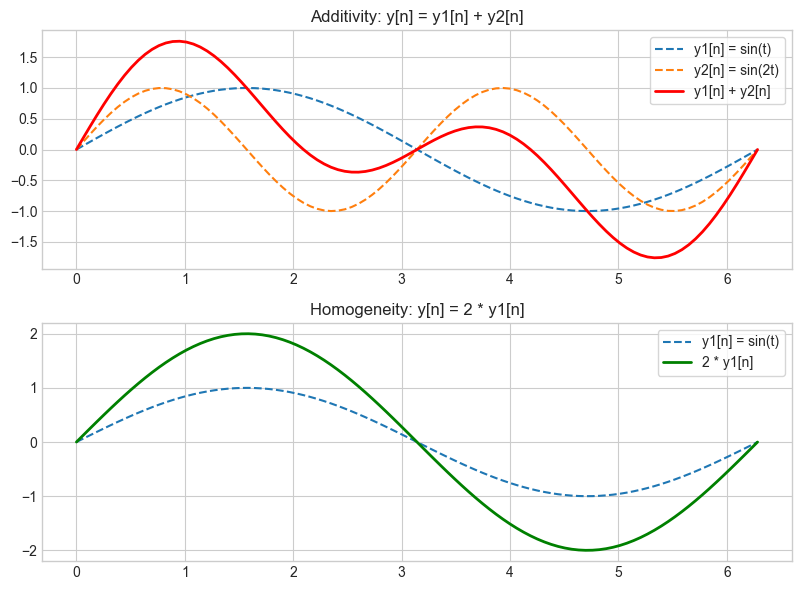

In [3]:
# Create a time array and input signals
t = np.linspace(0, 2 * np.pi, 100)
x1 = np.sin(t)
x2 = np.sin(2 * t)

# Define the system output (for example, identity system where output = input)
y1 = x1
y2 = x2
y_sum = y1 + y2  # Additivity
y_scaled = 2 * x1  # Homogeneity (scaling)

# Plot the inputs and outputs
fig, axs = plt.subplots(2, 1, figsize=(8, 6))

# Additivity
axs[0].plot(t, y1, label='y1[n] = sin(t)', linestyle='--')
axs[0].plot(t, y2, label='y2[n] = sin(2t)', linestyle='--')
axs[0].plot(t, y_sum, label='y1[n] + y2[n]', color='r', linewidth=2)
axs[0].set_title('Additivity: y[n] = y1[n] + y2[n]')
axs[0].legend()

# Homogeneity
axs[1].plot(t, y1, label='y1[n] = sin(t)', linestyle='--')
axs[1].plot(t, y_scaled, label='2 * y1[n]', color='g', linewidth=2)
axs[1].set_title('Homogeneity: y[n] = 2 * y1[n]')
axs[1].legend()

plt.tight_layout()
plt.show()

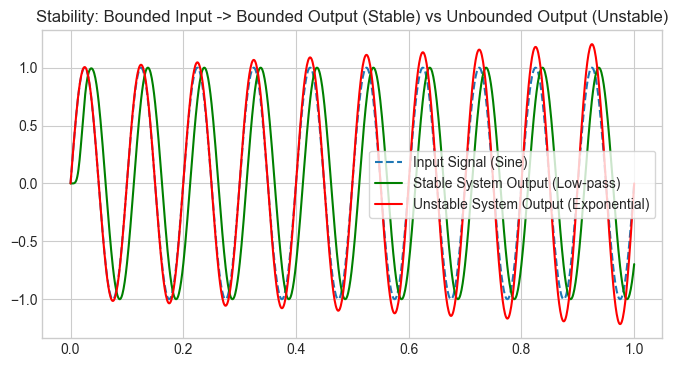

In [4]:
from scipy.signal import butter, lfilter

# Stable system: Low-pass filter
def butter_lowpass(cutoff, fs, order=5):
    nyquist = 0.5 * fs
    normal_cutoff = cutoff / nyquist
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return b, a

# Filter a signal using the low-pass filter
fs = 1000  # Sampling frequency
cutoff = 50  # Cutoff frequency of the filter
order = 6
b, a = butter_lowpass(cutoff, fs, order)

# Create a bounded input signal (sine wave)
t = np.linspace(0, 1.0, fs)
x_bounded = np.sin(2 * np.pi * 10 * t)  # Sine wave at 10 Hz

# Apply stable low-pass filter
y_stable = lfilter(b, a, x_bounded)

# Unstable system: Exponential growth (e.g., unstable feedback system)
y_unstable = np.exp(0.2 * t) * np.sin(2 * np.pi * 10 * t)  # Unstable sine signal

# Plot the stable vs unstable system
plt.figure(figsize=(8, 4))
plt.plot(t, x_bounded, label='Input Signal (Sine)', linestyle='--')
plt.plot(t, y_stable, label='Stable System Output (Low-pass)', color='g')
plt.plot(t, y_unstable, label='Unstable System Output (Exponential)', color='r')
plt.title('Stability: Bounded Input -> Bounded Output (Stable) vs Unbounded Output (Unstable)')
plt.legend()
plt.show()


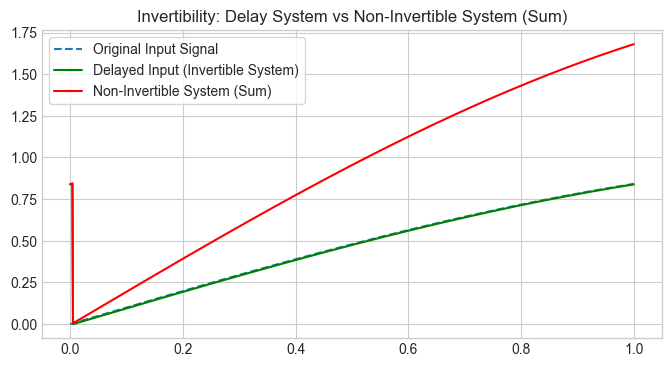

In [5]:
# Invertible system: Delay by 5 samples
delay_amount = 5
x_input = np.sin(t)
x_delayed = np.roll(x_input, delay_amount)  # Delayed signal

# Non-invertible system: Sum of inputs (loss of information)
y_non_invertible = x_input + x_delayed  # This is not invertible

# Plot both systems
plt.figure(figsize=(8, 4))
plt.plot(t, x_input, label='Original Input Signal', linestyle='--')
plt.plot(t, x_delayed, label=f'Delayed Input (Invertible System)', color='g')
plt.plot(t, y_non_invertible, label='Non-Invertible System (Sum)', color='r')
plt.title('Invertibility: Delay System vs Non-Invertible System (Sum)')
plt.legend()
plt.show()


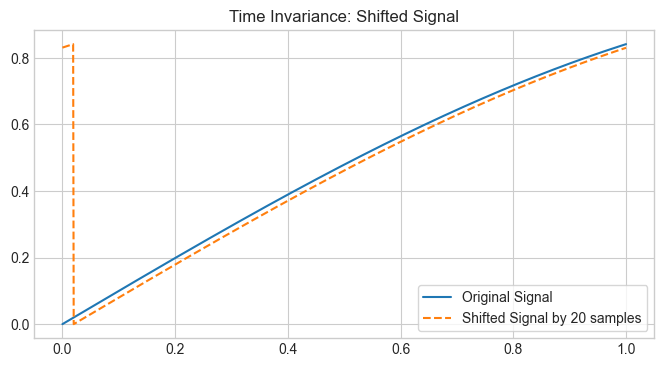

In [6]:
# Create a signal
x = np.sin(t)

# Apply time shift (e.g., shift by 20 samples)
shift_amount = 20
x_shifted = np.roll(x, shift_amount)

# Plot the original and shifted signals
plt.figure(figsize=(8, 4))
plt.plot(t, x, label='Original Signal')
plt.plot(t, x_shifted, label=f'Shifted Signal by {shift_amount} samples', linestyle='--')
plt.title('Time Invariance: Shifted Signal')
plt.legend()
plt.show()


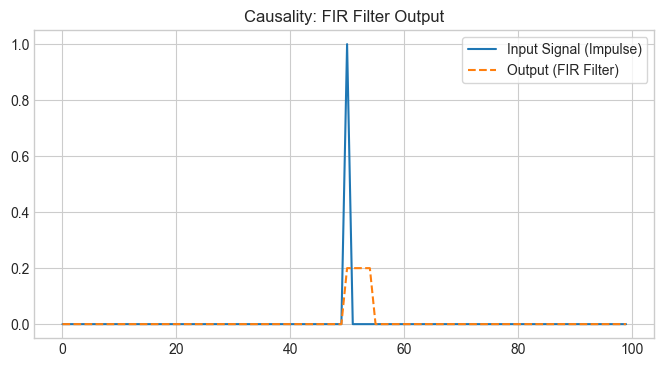

In [7]:
from scipy.signal import lfilter

# Create an example input signal (impulse response)
x_impulse = np.zeros(100)
x_impulse[50] = 1  # Impulse at the center

# Define a simple FIR filter (e.g., moving average filter)
filter_coeffs = np.ones(5) / 5  # Average over the last 5 samples
y_fir = lfilter(filter_coeffs, 1, x_impulse)

# Plot the impulse response of the causal system
plt.figure(figsize=(8, 4))
plt.plot(x_impulse, label='Input Signal (Impulse)')
plt.plot(y_fir, label='Output (FIR Filter)', linestyle='--')
plt.title('Causality: FIR Filter Output')
plt.legend()
plt.show()


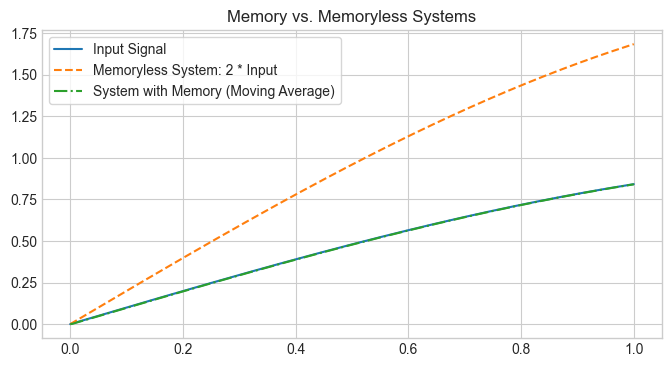

In [8]:
# Create a signal
x_signal = np.sin(t)

# Memoryless system (just scaling the input)
y_memoryless = 2 * x_signal

# System with memory (simple moving average filter)
y_with_memory = lfilter(np.ones(5)/5, 1, x_signal)

# Plot both systems
plt.figure(figsize=(8, 4))
plt.plot(t, x_signal, label='Input Signal')
plt.plot(t, y_memoryless, label='Memoryless System: 2 * Input', linestyle='--')
plt.plot(t, y_with_memory, label='System with Memory (Moving Average)', linestyle='-.')
plt.title('Memory vs. Memoryless Systems')
plt.legend()
plt.show()


In [9]:
# Law of Additivity test for linearity

import numpy as np

# Hypothetical audio processing system function
def audio_processing_system(input_signal):
    # For demonstration, let's assume the system just doubles the input signal
    # A real system might have more complex processing
    output_signal = np.cos(input_signal)
    return output_signal

# Define two input signals
input1 = np.array([1, 2, 3, 4, 5])  # Example input signal A
input2 = np.array([5, 4, 3, 2, 1])  # Example input signal B

# Process inputs individually
output1 = audio_processing_system(input1)
output2 = audio_processing_system(input2)

# Combine inputs and process combined input
combined_input = input1 + input2
combined_output = audio_processing_system(combined_input)

# Sum individual outputs
sum_of_outputs = output1 + output2

# Compare combined output with sum of individual outputs
if np.array_equal(combined_output, sum_of_outputs):
    print("The system follows the law of additivity and is likely linear.")
else:
    print("The system does not follow the law of additivity and is likely non-linear.")

The system does not follow the law of additivity and is likely non-linear.


In [10]:
# Law of Homogeneity test for linearity

# Hypothetical audio processing system function
def audio_processing_system(input_signal):
    # For demonstration, let's assume the system just doubles the input signal
    # A real system might have more complex processing
    output_signal = 2 * input_signal + 1
    return output_signal

# Define an input signal
input_signal = np.array([1, 2, 3, 4, 5])  # Example input signal

# Define a scaling factor
scaling_factor = 3

# Process the original input signal
original_output = audio_processing_system(input_signal)

# Scale the input signal and process the scaled input
scaled_input = scaling_factor * input_signal
scaled_output = audio_processing_system(scaled_input)

# Check if the scaled output is the scaling factor times the original output
expected_scaled_output = scaling_factor * original_output

# Compare scaled output with expected scaled output
if np.array_equal(scaled_output, expected_scaled_output):
    print("The system follows the law of homogeneity and is likely linear.")
else:
    print("The system does not follow the law of homogeneity and is likely non-linear.")


The system does not follow the law of homogeneity and is likely non-linear.
